# Spectral Clustering - correction

On veut couper un graphe en deux en coupant le moindre d'arcs possible. C'est un algorithme de [clustering](https://en.wikipedia.org/wiki/Cluster_analysis). Correction du notebook qui contient l'énoncé.

## Un graphe

In [1]:
# tutoriel_graphe
noeuds = {
    0: "le",
    1: "silences",
    2: "quelques",
    3: "\xe9crit",
    4: "non-dits.",
    5: "Et",
    6: "risque",
    7: "\xe0",
    8: "qu'elle,",
    9: "parfois",
    10: "aim\xe9",
    11: "lorsque",
    12: "que",
    13: "plus",
    14: "les",
    15: "Minelli,",
    16: "n'oublierai",
    17: "je",
    18: "prises",
    19: "sa",
    20: "la",
    21: "jeune,",
    22: "qu'elle,",
    23: "\xe0",
    24: "ont",
    25: "j'ai",
    26: "chemin",
    27: "\xe9tranger",
    28: "lente",
    29: "de",
    30: "voir",
    31: "quand",
    32: "la",
    33: "recul,",
    34: "de",
    35: "trop",
    36: "ce",
    37: "Je",
    38: "Il",
    39: "l'extr\xeame",
    40: "J'ai",
    41: "silences,",
    42: "qu'elle,",
    43: "le",
    44: "trace,",
    45: "avec",
    46: "seras",
    47: "dire,",
    48: "femme",
    49: "soit",
}
arcs = {
    (3, 15): None,
    (46, 47): None,
    (42, 33): None,
    (35, 45): None,
    (1, 14): None,
    (22, 26): None,
    (26, 28): None,
    (43, 29): None,
    (40, 41): None,
    (29, 44): None,
    (17, 3): None,
    (32, 37): None,
    (24, 19): None,
    (46, 34): None,
    (11, 19): None,
    (34, 49): None,
    (22, 2): None,
    (37, 48): None,
    (14, 12): None,
    (3, 10): None,
    (5, 18): None,
    (12, 24): None,
    (34, 32): None,
    (45, 39): None,
    (37, 26): None,
    (33, 45): None,
    (34, 47): None,
    (36, 31): None,
    (29, 47): None,
    (13, 11): None,
    (12, 21): None,
    (2, 16): None,
    (5, 4): None,
    (33, 35): None,
    (28, 49): None,
    (25, 49): None,
    (21, 0): None,
    (3, 13): None,
    (18, 24): None,
    (12, 7): None,
    (13, 15): None,
    (11, 1): None,
    (16, 23): None,
    (37, 45): None,
    (27, 32): None,
    (32, 41): None,
    (8, 24): None,
    (10, 1): None,
    (2, 24): None,
    (24, 11): None,
    (2, 14): None,
    (47, 36): None,
    (48, 39): None,
    (30, 25): None,
    (30, 43): None,
    (15, 14): None,
    (26, 27): None,
    (6, 8): None,
    (20, 10): None,
    (19, 17): None,
    (5, 7): None,
    (44, 25): None,
    (27, 38): None,
    (2, 0): None,
    (3, 18): None,
    (3, 9): None,
    (25, 33): None,
    (42, 48): None,
    (2, 15): None,
    (26, 48): None,
    (26, 38): None,
    (7, 8): None,
    (8, 4): None,
}

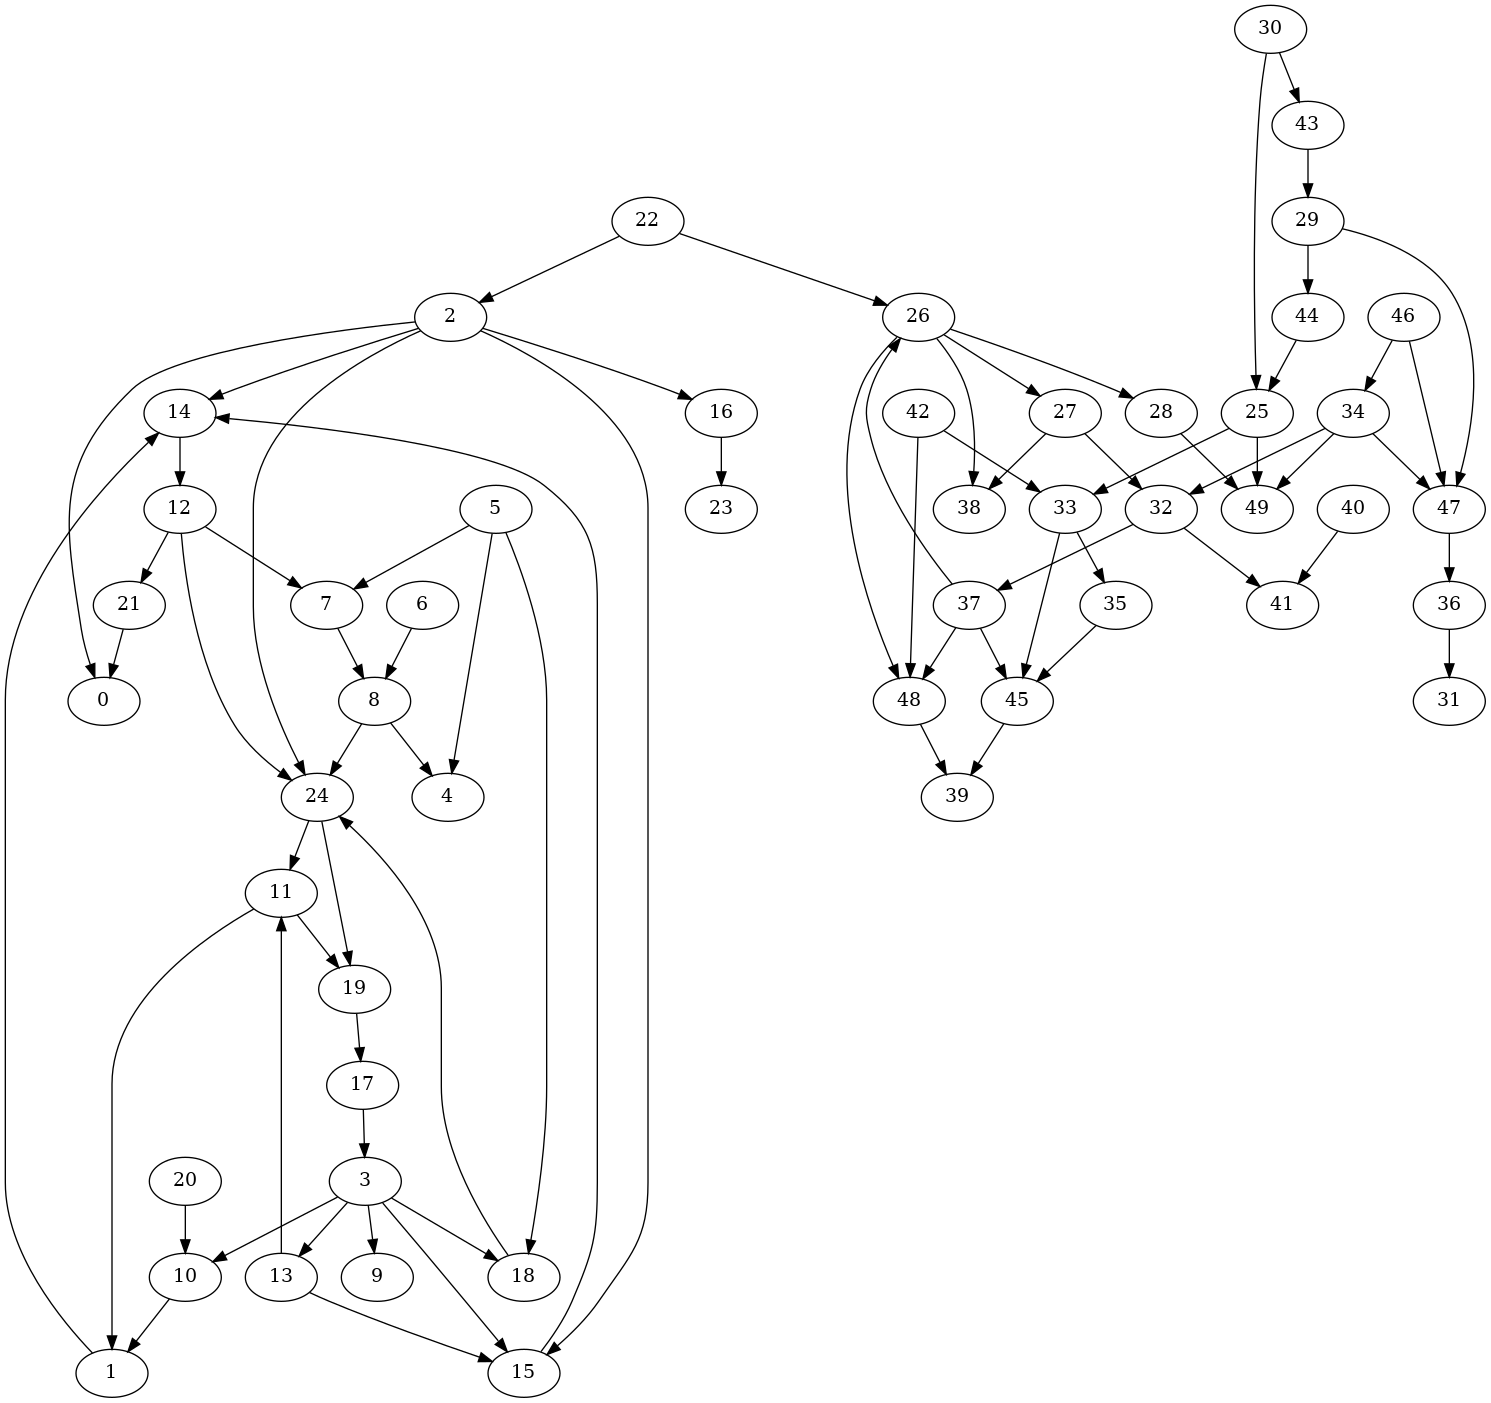

In [2]:
from teachpyx.tools.graphviz_helper import draw_graph_graphviz
from IPython.display import Image

draw_graph_graphviz(noeuds, arcs, "image.png")
Image("image.png", width=400)

## Partie 1 : clustering en pratique

### Q1

L'algorithme [Minimum Spanning Tree](https://fr.wikipedia.org/wiki/Arbre_couvrant_de_poids_minimal) supprime le plus d'arcs possible tout en gardant une seule composante connexe.

### Q2

### Q3

Soit $M=(m_{ij})$ ce laplacien : 

$$m_{ij} = \left \{ \begin{array}{ll} d_i & \text{ si } i = j \\ -1  & \text{ s'il existe un arc reliant } i \text{ et } j \\ 0 & \text{ sinon}  \end{array} \right .$$

In [3]:
import numpy


def Laplacien(edges):
    mat = {}
    for k in edges:
        i, j = k
        if i != j:
            mat[i, j] = -1
            mat[j, i] = -1
            if (i, i) not in mat:
                mat[i, i] = 0
            if (j, j) not in mat:
                mat[j, j] = 0
            mat[i, i] += 1
            mat[j, j] += 1
    maxi = max(max(_) for _ in mat) + 1
    nmat = numpy.zeros((maxi, maxi))
    for (i, j), v in mat.items():
        nmat[i, j] = v
    return nmat


mat = Laplacien(arcs)
mat

array([[ 2.,  0., -1., ...,  0.,  0.,  0.],
       [ 0.,  3.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  4.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  3.]])

### Q4

Par construction, le vecteur $(1, ..., 1)$ est le vecteur propre associé à la valeur propre 0.

### Q5

In [4]:
def eigen(mat, sort=True):
    l, v = numpy.linalg.eig(mat)

    if sort:
        li = list(l)
        li = [(_, i) for i, _ in enumerate(li)]
        li.sort()

        pos = [_[1] for _ in li]
        l = numpy.array([_[0] for _ in li])

        mat = v.copy()
        for i in range(0, len(pos)):
            mat[:, i] = v[:, pos[i]]

        return l, mat
    else:
        return l, v


val, vec = eigen(mat)
val

array([1.29862811e-15, 2.97516377e-02, 2.10328629e-01, 2.90790022e-01,
       3.11774822e-01, 3.71706160e-01, 4.10657750e-01, 6.06987653e-01,
       6.47893457e-01, 6.95288785e-01, 9.17873789e-01, 9.62159368e-01,
       1.00171710e+00, 1.22716812e+00, 1.43721861e+00, 1.46689480e+00,
       1.50739404e+00, 1.65758626e+00, 1.67080933e+00, 2.01271960e+00,
       2.06246640e+00, 2.12023335e+00, 2.15823780e+00, 2.40007127e+00,
       2.42330441e+00, 2.44200543e+00, 2.48046940e+00, 2.83472417e+00,
       2.88760137e+00, 2.98652806e+00, 3.05062459e+00, 3.45716799e+00,
       3.55952462e+00, 3.72589427e+00, 3.86383519e+00, 3.98776759e+00,
       4.24048853e+00, 4.51749090e+00, 4.76260241e+00, 5.09890091e+00,
       5.16973825e+00, 5.38422915e+00, 5.54406301e+00, 5.82908856e+00,
       6.06195525e+00, 6.21987207e+00, 6.51026374e+00, 7.31385944e+00,
       7.36832387e+00, 8.10194808e+00])

### Q6

In [5]:
vec[:, 1]

array([ 0.12706645,  0.1471807 ,  0.11300729,  0.1497489 ,  0.15689742,
        0.15497599,  0.15887778,  0.15239956,  0.1541509 ,  0.15434079,
        0.15308929,  0.14778115,  0.14353765,  0.14642567,  0.13629278,
        0.13739056,  0.1202737 ,  0.15177162,  0.1510202 ,  0.14927889,
        0.15778361,  0.13734517,  0.00981551,  0.12396176,  0.14384261,
       -0.14991691, -0.0936683 , -0.10998677, -0.11870976, -0.16228832,
       -0.15880678, -0.17617328, -0.12965455, -0.13772134, -0.14785981,
       -0.13627598, -0.17093183, -0.1189228 , -0.10336518, -0.12629383,
       -0.14222274, -0.13799138, -0.12981884, -0.16297189, -0.15845984,
       -0.13077619, -0.15656133, -0.16060489, -0.11805402, -0.14021942])

### Q7

On classe les noeuds en deux classes selon qu'ils sont associés à une valeur positive ou négative d'après ce vecteur propre. On peut maintenant déterminer quel noeud appartient à la première composante, quel noeud appartient à la seconde. Ecrire une fonction qui calcule le nombre d'arcs qui relient un noeud de la première composante à un noeud de la seconde. Quel est le résultat ?

## Partie 3 : un peu plus loin

On applique cette méthode à un problème de clusterisation.

<Axes: xlabel='x', ylabel='y'>

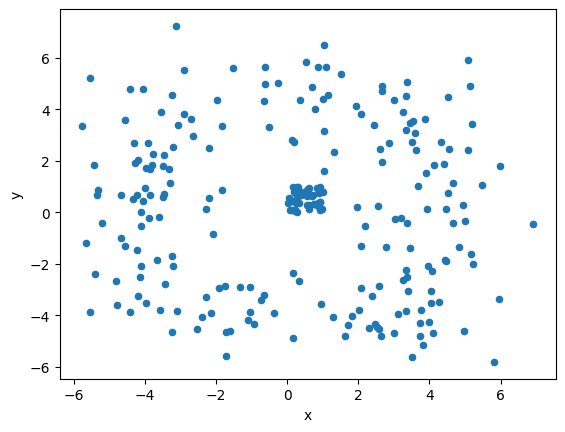

In [6]:
import pandas

points = [
    (0.84737386691659533, 0.95848816613228727),
    (0.28893525107454354, 0.66073249195336492),
    (0.60382037086559148, 0.13747945088383384),
    (0.21951613156582261, 0.040905525433785228),
    (0.21613062123493632, 0.096875623632852625),
    (0.99787588721497178, 0.79337171783327132),
    (0.18576957348508683, 0.78396225027633837),
    (0.23875443625588322, 0.35497638429086975),
    (0.8713637939628045, 0.22983756618811024),
    (0.28301724069085921, 0.99408996134013161),
    (0.39792684083973429, 0.77105362865540716),
    (0.75452041353842147, 0.330325155167562),
    (0.24824845436118537, 0.95998690078041737),
    (0.92318434139996397, 0.38115765401571988),
    (0.54660304309415886, 0.62093667623480242),
    (0.58899996464290505, 0.9017292023892568),
    (0.60541336358687847, 0.28929082523865812),
    (0.87925379747840293, 0.94834058131858756),
    (0.61449632813730748, 0.94264237081849722),
    (0.13119804743502139, 0.44158556198130949),
    (0.20660796942108339, 0.915599021810789),
    (0.3097131996826511, 0.81979953110332837),
    (0.89711055197298928, 0.7298496710091944),
    (0.22499060312661545, 0.072786594549671291),
    (0.012604758185058018, 0.36199484670070914),
    (0.92050750708863993, 0.91447248587261709),
    (0.26304069827339327, 0.026058147250910935),
    (0.59289937178711172, 0.86673111722782969),
    (0.70640070176443837, 0.64096733852134291),
    (0.049399266565914535, 0.54027723332288746),
    (0.26450585597978316, 0.50883097182669357),
    (0.91987410679455195, 0.97753050553942622),
    (0.5618293073273094, 0.27688371997865069),
    (0.91241761244784847, 0.090310675429991605),
    (0.90925789663628509, 0.40628594240956295),
    (0.3832814495252409, 0.66221025722485627),
    (0.74928785967005418, 0.32840192750838815),
    (0.25478832731446643, 0.70269825611412617),
    (0.54293534537395793, 0.87800254191632932),
    (0.89603330911109724, 0.77106655965183546),
    (0.29830084404349644, 0.97117954065316903),
    (0.075137754060910056, 0.086473140735377596),
    (0.120307047737505, 0.073651360408690802),
    (0.87835916829742444, 0.34622147871872355),
    (0.20567119579830373, 0.42658381934346423),
    (0.27715586337053655, 0.87999487046170488),
    (0.16364186693234739, 0.98604111274325335),
    (0.31830209002283116, 0.36372930495109934),
    (0.73434680601907532, 0.65926820980026724),
    (0.9830474686174655, 0.12246834322318068),
    (4.0293130665095358, -3.0529459366329164),
    (-3.7755737603387041, 2.2685053357046323),
    (-2.1926920625846602, 2.4857321786911326),
    (5.1445647965531025, 4.8943143876324848),
    (0.87403644639763023, 5.6464000746270226),
    (-3.5545355219233219, 3.8988261206085766),
    (2.0785612031685732, -1.2948920530351256),
    (-3.4682717483474708, 2.2364561845005868),
    (2.0695530720860349, -2.9439062757612424),
    (3.9563571060210054, -2.0678946581365616),
    (3.2485209278176157, -2.6386418932454814),
    (-3.4800728241977779, 0.72646452125011518),
    (-1.8341241854718167, 3.3482541467971951),
    (-4.5558692651012178, 3.5624030818263908),
    (-4.6768285328272157, -1.0106699901361971),
    (3.9175303893386597, 0.1087117017596031),
    (-3.9111941479785823, 2.70001353796486),
    (-5.5501953466420737, -3.8544512068951891),
    (1.9246058344257151, 4.123740240481137),
    (-4.110657752575519, -2.0774760107085393),
    (2.6547967574269418, 4.6868873425221045),
    (-1.9308254017076039, -2.9448006865754279),
    (-3.0788555249744247, 3.396205767032443),
    (-4.0516249434348621, 0.42035392996461629),
    (-2.2989465364173602, -3.2706795830191275),
    (4.651698949077459, 1.1364194264447973),
    (3.3637257964296152, -2.5082040184760555),
    (-3.2502121678035314, 4.5383631321594571),
    (4.5274668721202556, 4.473426056956777),
    (3.400114365788911, -3.0434200740148363),
    (3.513062501300436, 2.718209259961025),
    (-2.3986743034356737, -4.0590996420222467),
    (2.6632346815268289, 4.8894243587379433),
    (4.2802341564965607, -3.4921791441653762),
    (-1.5297912885016269, 5.5780900056883569),
    (4.0634598983096293, -2.2904478604819776),
    (1.0857595813036722, 5.6366192967000295),
    (-4.5596385297232223, -1.3177709282351766),
    (-2.1361714943468244, -3.9107871995830976),
    (3.7240531749202161, -4.8033709892679886),
    (-4.1017624989859351, -0.54374796617700816),
    (2.3715344477591818, -3.2387553898801391),
    (3.8187172884547076, -5.1522284671097314),
    (1.0454193728074506, 3.1688190599740418),
    (-3.9848808505730315, -3.5176013894081675),
    (-4.1965918931505275, 2.0248869962483522),
    (3.4535361867324776, 3.4437155145638751),
    (-3.2171776428648808, -2.0867326734388021),
    (-3.5763512667620065, -3.785293447306691),
    (-3.2489915323631275, -4.6589505137265448),
    (1.2817385669950028, -4.0553290947191964),
    (-5.5481507299407191, 5.2080477057573553),
    (-2.2817876881965624, 0.12512408298772948),
    (-3.4831125975271719, 1.7834950195462245),
    (-4.2064606598908139, -3.2421411165648886),
    (-5.3461204499811092, 0.65966593807378215),
    (-0.36559473517464181, -3.9248327086099932),
    (-4.4223418217602317, 4.790875007038224),
    (-3.9026572243192548, -0.21621909226838504),
    (0.16100173690141428, -4.8875278273011942),
    (-4.2792213808538602, 1.9041297697847308),
    (-4.4298318748123444, -3.8717874765920124),
    (3.2660121035644738, 3.8922848961161609),
    (4.4724681658043082, -1.8875314666371643),
    (-3.1337207059785208, 7.2290596706950154),
    (5.0970619686963916, 2.4188864705446997),
    (-1.824501293502089, 0.87811217547665232),
    (2.6141377553638456, 2.4736768016729647),
    (-3.9646033676482686, 1.7291507868196327),
    (-5.6494860793108481, -1.1744278681124489),
    (3.3291564189715617, 3.1892910878432268),
    (2.6260111359196396, -4.8029748349762125),
    (-4.1110554486386404, 0.0087017311510849682),
    (-3.812034605848817, 1.8310006567642712),
    (-4.0643824785110239, 4.7806635726760689),
    (-3.8724397920934015, 0.65927045141188367),
    (-3.6202135060380289, -0.18281430910806151),
    (1.8134764145891591, -4.0328054369849538),
    (4.0315824591034124, -3.5339867923196042),
    (-3.0906912982614791, -3.8390710019489158),
    (0.77019164393866146, 4.0099320163703895),
    (-3.2239134319849398, 2.5227757084315567),
    (-2.5342615497190861, -4.5402720724503229),
    (0.52313297572359074, 5.8268409663350287),
    (-2.0896974241486603, -0.83931337455192145),
    (5.9824769771009292, 1.8062615072223389),
    (-1.7151819974072808, -4.6553638508191835),
    (-0.94296691141453703, -4.3332773280899097),
    (-2.9080659785364102, 3.8017876981653527),
    (-4.146797854411842, -2.4943345068020939),
    (-1.6135304662636716, -4.5968234340599352),
    (-5.2240732422979015, -0.40050907128273239),
    (3.0003615064702411, 4.3564534485947091),
    (1.5251603471425388, 5.3602495377614252),
    (0.70829180528117897, 4.8705912438690024),
    (-1.9857439387875215, 4.3495410597763557),
    (-1.7415118623160484, -2.8482449535792851),
    (3.1227029816875906, -3.943690794192229),
    (2.5533372938495322, 0.23654193364300019),
    (4.9320538122814632, 0.27398085527961841),
    (3.5379571426787906, 3.5479478416595258),
    (-3.9952197756192462, 0.9519866242123729),
    (-0.63418929807710789, 4.9714021509147459),
    (3.7514419719026835, -3.7952656655539831),
    (5.8168652955867248, -5.8059389896821614),
    (-3.86083201462211, 1.6763339473293351),
    (5.2346287443442741, -2.0049022214331869),
    (3.0159172780756807, -4.6747832401686313),
    (1.9625789720275502, 0.21332969214064601),
    (-5.4459656516053521, 1.8490131071943328),
    (5.4887755131556295, 1.0537691340713213),
    (4.1214658457920255, 1.8180419262808878),
    (1.0417225435808637, 6.4876076903545457),
    (5.2056831059665383, 3.4403227294912879),
    (-3.29183542445509, 1.1299087065549616),
    (-4.6894950904308068, 0.67877427899602139),
    (-4.2334935303450196, 0.66692066781151726),
    (6.918359229911677, -0.43825691963852248),
    (5.0912552685819197, 5.9256467457380193),
    (3.9995400634925016, -4.2633779062253305),
    (-1.3270510253578853, -2.8998811026998816),
    (-3.4372749748248483, -2.800876689538256),
    (2.5720483206059228, -4.5479241832525954),
    (3.5107697954439923, -5.6063323885377114),
    (3.45355690226015, -1.3924594206301864),
    (4.8170391803389006, -1.3343907023480963),
    (1.1592191821861308, 4.551692003143347),
    (-2.2147820707711716, 0.55930561729387951),
    (-3.2364813901253862, -1.7059292544869302),
    (3.5980046177747229, 3.0606302788023871),
    (3.0235041652892747, -0.27015781708378661),
    (2.4303330714757383, 3.3989583334332432),
    (2.4649562148782955, -4.3524552397826168),
    (-3.3322237797463616, 1.6813558717119386),
    (4.3359544685337736, 2.7104894884469877),
    (3.350410042767797, -3.8412188670946792),
    (-2.8993273426849919, 5.5101185505218293),
    (3.3563537615645282, 5.0439247587050282),
    (3.3738404946436238, -0.43277784903448813),
    (1.6236691719193734, -4.8192122194763103),
    (-4.3000303214498619, 2.7045156595962521),
    (3.2036876689968699, -0.22379027409222038),
    (5.0078193725337679, -0.33061456656172339),
    (1.3173753727230917, 2.3292728936983247),
    (0.17305051546078376, -2.3708524146324814),
    (0.18920570140751003, 2.7288547711089577),
    (4.5559793038807355, 2.4460955268542377),
    (-0.65537111745445098, 4.3024274811626642),
    (0.32733974310015845, -2.6653194005399481),
    (-4.3495524342659682, 0.50620561077402126),
    (3.6859406925109957, 1.0042337939426813),
    (-5.4168309661540643, -2.3784247121303279),
    (2.0873449293614152, 3.8206900404120345),
    (3.3397623772131446, -2.2347446764630474),
    (2.8720948774765485, 2.6955132035521556),
    (5.9472576652843694, -3.3542922693748149),
    (1.030233796538444, 1.6199282129862145),
    (-1.7351581782776853, -5.5709314373179808),
    (0.14607908112131446, 2.79251837326064),
    (0.37002429983216167, 4.3653059393186942),
    (3.8616789948811956, 3.6100436336617339),
    (-4.8019087210485418, -3.5911421188072357),
    (1.6953052292111459, -4.3928959775316905),
    (-1.049532260408768, -2.9169000088107522),
    (-4.8042700374731648, -2.6636201843555991),
    (2.2856117402115821, -4.497386564362329),
    (-1.1085015582769402, -4.1635806015318408),
    (-0.51764720743541925, 3.3207617687324866),
    (2.6552485122750968, 1.9457154950840061),
    (4.4574030967957459, 0.13220998701481373),
    (4.1064026703010086, -4.6992062016898437),
    (3.6218017958370492, 2.4171784152426357),
    (2.1893570148164336, -0.53987360896641756),
    (-0.62289304323418893, 5.6377915319211773),
    (0.95656595366184183, -3.5482370903224183),
    (4.6552715153624238, -0.42419842122106877),
    (3.9138981541477369, 1.5211086418661788),
    (-5.7643908686171743, 3.3462875243179644),
    (4.4001664954474204, 1.8715548148469952),
    (3.7209034976257116, -4.3132712976844925),
    (2.0077653108424371, -3.8044349295045858),
    (-2.7004396541700451, 3.6313151291578776),
    (2.7805282578575432, -1.3496033840422226),
    (2.5149407509344646, -4.4491799573779538),
    (-3.4969549443875327, 0.59052341158001964),
    (2.5871839418980924, -2.8626995345211439),
    (4.530084220131168, 0.73947783901217035),
    (-4.2278934560638541, -1.4480933790189707),
    (-3.6638968948801822, -1.8603129450393652),
    (1.0034748779660814, 4.3783603559660618),
    (-0.24711046251746965, 5.0245225170472958),
    (-0.75233017871629115, -3.4003624728787472),
    (-5.3204808270534789, 0.8530050107548528),
    (-0.66555456366565435, -3.210607962975542),
    (4.4312598575388913, -1.8510534338146063),
    (-1.0579141292803367, -3.8599892658343156),
    (5.1580465239922022, -1.6376354853614972),
    (-2.6525127599513731, 2.9406618825179196),
    (3.3353268107001339, 4.5193520805659642),
    (4.9838132614191322, -4.5937246171656669),
]
df = pandas.DataFrame(points, columns=["x", "y"])
df.plot.scatter(x="x", y="y")

On note $d(X_1,X_2)$ la distance euclidienne entre deux points $X_1$ et $X_2$. On construit le Laplacien suivant à partir d'un ensemble de points du plan $(X_i)_i$.

$$m_{ij} = \left \{ \begin{array}{ll} -e^{-d(X_i,X_j)^2}  & \text{ si } i \neq j \\ \sum_{i \neq j} e^{-d(X_i,X_j)^2} & \text{ si } i = j \end{array} \right .$$

### Q1

In [7]:
import math


def distance(p1, p2):
    dx = p1[0] - p2[0]
    dy = p1[1] - p2[1]
    return math.exp(-(dx**2 + dy**2))


def CreateProximityMatrix(points):
    n = len(points)
    mat = [[0.0 for i in range(0, n)] for j in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            if i != j:
                mat[i][j] = -distance(points[i], points[j])
    for i in range(0, n):
        mat[i][i] = -sum(mat[i])
    return numpy.matrix(mat)


mat = CreateProximityMatrix(points)
mat

matrix([[ 3.33607823e+01, -6.69976843e-01, -4.80285954e-01, ...,
         -9.41648335e-08, -6.38278275e-09, -1.51753802e-21],
        [-6.69976843e-01,  3.90919719e+01, -6.88702158e-01, ...,
         -9.65910722e-07, -3.18671103e-11, -2.73374647e-22],
        [-4.80285954e-01, -6.88702158e-01,  3.45881912e+01, ...,
         -9.59966914e-09, -2.63553433e-12, -8.85061645e-19],
        ...,
        [-9.41648335e-08, -9.65910722e-07, -9.59966914e-09, ...,
          5.08380506e+00, -2.21989770e-17, -1.05000993e-50],
        [-6.38278275e-09, -3.18671103e-11, -2.63553433e-12, ...,
         -2.21989770e-17,  5.56991352e+00, -5.65510715e-38],
        [-1.51753802e-21, -2.73374647e-22, -8.85061645e-19, ...,
         -1.05000993e-50, -5.65510715e-38,  2.18345495e+00]])

### Q2

Implémentez la méthode suggérée et dessinez le résultat.